In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures

In [106]:
df=pd.read_csv('loan_data.csv')
df.head()
df=df.dropna()
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)

In [152]:

X=df.drop(['Loan_ID', 'Loan_Status'], axis=1)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [153]:
y=df['Loan_Status']
y=y.map(dict(Y=1,N=0))

In [154]:
X=pd.get_dummies(X)

In [155]:
X.head()
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [192]:
"""smote=SMOTE(ratio='minority')
X1,y=smote.fit_sample(X,y)"""
sc=StandardScaler()
X_scaled = sc.fit_transform(X.reshape(20,-1))
X = X_scaled.reshape( -1, 20)

In [193]:
X=sc.fit_transform(X)

In [194]:
X.shape


(480, 20)

In [195]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1,random_state=42, shuffle=True)

In [196]:
print(X_train[0])

[-0.26598503  1.59695464  0.2109854   1.96561764  1.71845034 -0.32654587
  1.72999953 -0.56503593  1.794006   -0.93698834  3.00429712 -0.55363626
 -0.37610345 -1.90562751  3.27172379  1.54659862 -0.52195683 -0.6188153
  1.84022743 -0.40240812]


In [197]:
print(X_train.shape, y_train.shape)
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

(432, 20) (432,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
y_pred=pol_reg.predict(X_test)
y_pred=(y_pred>0.5)

In [199]:
cm=confusion_matrix(y_pred,y_test)

In [200]:
accuracy_score(y_pred,y_test)

0.8125

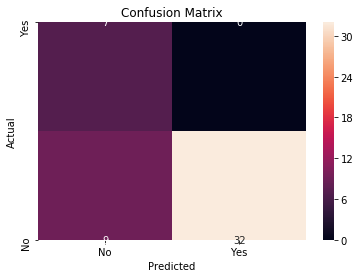

In [201]:
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(['No','Yes']);
ax.yaxis.set_ticklabels(['Yes','No']);

In [179]:
import pickle
from sklearn.externals import joblib 
filename='loan_model.pkl'
joblib.dump(pol_reg,filename)

['loan_model.pkl']

In [180]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [181]:
pd.get_dummies(df[['Married','Gender']])

,Married_No,Married_Yes,Gender_Female,Gender_Male
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1
5,0,1,0,1
...,...,...,...,...
609,1,0,1,0
610,0,1,0,1
611,0,1,0,1
612,0,1,0,1
